# Plot Results

Create plots based on the results of the evaluation of the models.

In [1]:
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(context="paper", font_scale=1.0, style="whitegrid")
# sns.set_context(context="paper", font_scale=1.0)

In [3]:
RESULTS_CSV = "./../../results.csv"
EVALUATION_RESULTS_CSV = "./../../evaluation_results.csv"

IMAGES_SAVE_FOLDER = "./../../latex/plots/"

In [4]:
evaluation_data_df = pd.read_csv(EVALUATION_RESULTS_CSV)
evaluation_data_df["episode_rewards"] = evaluation_data_df["episode_rewards"].apply(literal_eval)
evaluation_data_df

game                     model  model_id  \
0    seaquest               random play         0   
1      enduro               random play         0   
2    breakout               random play         0   
3    seaquest                  mnih2013         0   
4    seaquest                  mnih2013         1   
..        ...                       ...       ...   
181  breakout  3-Snapshot Soup mnih2013         1   
182  breakout  3-Snapshot Soup mnih2013         2   
183  breakout  3-Snapshot Soup mnih2015         0   
184  breakout  3-Snapshot Soup mnih2015         1   
185  breakout  3-Snapshot Soup mnih2015         2   

                                       episode_rewards    mean  \
0    [0.0, 60.0, 240.0, 80.0, 20.0, 80.0, 160.0, 14...  81.840   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   0.000   
2    [1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 0.0, 3.0, ...   1.332   
3    [80.0, 20.0, 40.0, 80.0, 60.0, 160.0, 20.0, 40...  62.000   
4    [20.0, 40.0, 20.0, 60.0, 40.0, 60.0, 60.0, 120...  52.000   
..                                                 ...     ...   
181  [1.0, 1.0, 1.0, 1.0, 7.0, 0.0, 0.0, 0.0, 1.0, ...   1.300   
182  [0.0, 1.0, 1.0, 2.0, 4.0, 2.0, 2.0, 0.0, 0.0, ...   1.500   
183  [0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, ...   0.800   
184  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   0.000   
185  [6.0, 1.0, 5.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   1.400   

     standard_deviation                                         model_path  
0             63.458761                                                NaN  
1              0.000000                                                NaN  
2              1.433100                                                NaN  
3             42.379240  mnih2013/seaquest/started_at_2023-09-25_12-09-...  
4             27.129320  mnih2013/seaquest/started_at_2023-09-25_12-41-...  
..                  ...                                                ...  
181            1.951922  ('mnih2013/breakout/started_at_2023-09-26_04-5...  
182            1.284523  ('mnih2013/breakout/started_at_2023-09-26_04-4...  
183            0.979796  ('mnih2015/breakout/started_at_2023-09-26_07-0...  
184            0.000000  ('mnih2015/breakout/started_at_2023-09-28_01-3...  
185            2.107131  ('mnih2015/breakout/started_at_2023-09-28_01-2...  

[186 rows x 7 columns]

In [5]:
# Add mean:
evaluation_data_df.sort_values(by=["mean"], ascending=False, inplace=True)

In [6]:
naming_scheme = {
    "random play": "Random Play",
    "interpretable_cnn": "Interpretable CNN",
    "mnih2013": "Mnih et al. (2013)",
    "mnih2015": "Mnih et al. (2015)",
    "with_huber_loss_and_adam": "Mnih et al. (2015) with Huber Loss and Adam",
    "Top-3 Soup of mnih2013": "Top-3 Soup of Mnih et al. (2013)",
    "Top-3 Soup of mnih2015": "Top-3 Soup of Mnih et al. (2015)",
    "Top-3 Soup of with_huber_loss_and_adam": "Top-3 Soup of Mnih et al. (2015) with Huber Loss and Adam",
    "Top-3 Mixed Ensemble (average)": "Top-3 Mixed Ensemble (average)",
    "Top-3 Mixed Ensemble (logistic_average)": "Top-3 Mixed Ensemble (logistic average)",
    "Top-3 Mixed Ensemble (majority_vote)": "Top-3 Mixed Ensemble (majority vote)",
    "Top-3 Ensemble (average) with mnih2013": "Top-3 Ensemble (average) with Mnih et al. (2013)",
    "Top-3 Ensemble (average) with mnih2015": "Top-3 Ensemble (average) with Mnih et al. (2015)",
    "Top-3 Ensemble (average) with with_huber_loss_and_adam": "Top-3 Ensemble (average) with Mnih et al. (2015) with Huber Loss and Adam",
    "Top-3 Ensemble (logistic_average) with mnih2013": "Top-3 Ensemble (logistic average) with Mnih et al. (2013)",
    "Top-3 Ensemble (logistic_average) with mnih2015": "Top-3 Ensemble (logistic average) with Mnih et al. (2015)",
    "Top-3 Ensemble (logistic_average) with with_huber_loss_and_adam": "Top-3 Ensemble (logistic average) with Mnih et al. (2015) with Huber Loss and Adam",
    "Top-3 Ensemble (majority_vote) with mnih2013": "Top-3 Ensemble (majority vote) with Mnih et al. (2013)",
    "Top-3 Ensemble (majority_vote) with mnih2015": "Top-3 Ensemble (majority vote) with Mnih et al. (2015)",
    "Top-3 Ensemble (majority_vote) with with_huber_loss_and_adam": "Top-3 Ensemble (majority vote) with Mnih et al. (2015) with Huber Loss and Adam",
    "3-Snapshot Ensemble (average) with mnih2013": "3-Snapshot Ensemble (average) with Mnih et al. (2013)",
    "3-Snapshot Ensemble (average) with mnih2015": "3-Snapshot Ensemble (average) with Mnih et al. (2015)",
    "3-Snapshot Ensemble (average) with with_huber_loss_and_adam": "3-Snapshot Ensemble (average) with Mnih et al. (2015) with Huber Loss and Adam",
    "3-Snapshot Ensemble (logistic_average) with mnih2013": "3-Snapshot Ensemble (logistic average) with Mnih et al. (2013)",
    "3-Snapshot Ensemble (logistic_average) with mnih2015": "3-Snapshot Ensemble (logistic average) with Mnih et al. (2015)",
    "3-Snapshot Ensemble (logistic_average) with with_huber_loss_and_adam": "3-Snapshot Ensemble (logistic average) with Mnih et al. (2015) with Huber Loss and Adam",
    "3-Snapshot Ensemble (majority_vote) with mnih2013": "3-Snapshot Ensemble (majority vote) with Mnih et al. (2013)",
    "3-Snapshot Ensemble (majority_vote) with mnih2015": "3-Snapshot Ensemble (majority vote) with Mnih et al. (2015)",
    "3-Snapshot Ensemble (majority_vote) with with_huber_loss_and_adam": "3-Snapshot Ensemble (majority vote) with Mnih et al. (2015) with Huber Loss and Adam",
    "3-Snapshot Soup mnih2013": "3-Snapshot Soup of Mnih et al. (2013)",
    "3-Snapshot Soup mnih2015": "3-Snapshot Soup of Mnih et al. (2015)",
    "3-Snapshot Soup with_huber_loss_and_adam": "3-Snapshot Soup of Mnih et al. (2015) with Huber Loss and Adam",
}

evaluation_data_df["model"] = evaluation_data_df["model"].apply(lambda x: naming_scheme[x])

In [7]:
evaluation_data_df_exploded = evaluation_data_df.explode("episode_rewards")
evaluation_data_df_exploded

game                                              model  model_id  \
167  seaquest              3-Snapshot Soup of Mnih et al. (2015)         2   
167  seaquest              3-Snapshot Soup of Mnih et al. (2015)         2   
167  seaquest              3-Snapshot Soup of Mnih et al. (2015)         2   
167  seaquest              3-Snapshot Soup of Mnih et al. (2015)         2   
167  seaquest              3-Snapshot Soup of Mnih et al. (2015)         2   
..        ...                                                ...       ...   
106    enduro  3-Snapshot Ensemble (logistic average) with Mn...         1   
106    enduro  3-Snapshot Ensemble (logistic average) with Mn...         1   
106    enduro  3-Snapshot Ensemble (logistic average) with Mn...         1   
106    enduro  3-Snapshot Ensemble (logistic average) with Mn...         1   
106    enduro  3-Snapshot Ensemble (logistic average) with Mn...         1   

    episode_rewards   mean  standard_deviation  \
167           320.0  378.0          128.202964   
167           200.0  378.0          128.202964   
167           340.0  378.0          128.202964   
167           560.0  378.0          128.202964   
167           320.0  378.0          128.202964   
..              ...    ...                 ...   
106             0.0    0.0            0.000000   
106             0.0    0.0            0.000000   
106             0.0    0.0            0.000000   
106             0.0    0.0            0.000000   
106             0.0    0.0            0.000000   

                                            model_path  
167  ('mnih2015/seaquest/started_at_2023-09-26_06-5...  
167  ('mnih2015/seaquest/started_at_2023-09-26_06-5...  
167  ('mnih2015/seaquest/started_at_2023-09-26_06-5...  
167  ('mnih2015/seaquest/started_at_2023-09-26_06-5...  
167  ('mnih2015/seaquest/started_at_2023-09-26_06-5...  
..                                                 ...  
106  ('mnih2013/enduro/started_at_2023-09-25_12-49-...  
106  ('mnih2013/enduro/started_at_2023-09-25_12-49-...  
106  ('mnih2013/enduro/started_at_2023-09-25_12-49-...  
106  ('mnih2013/enduro/started_at_2023-09-25_12-49-...  
106  ('mnih2013/enduro/started_at_2023-09-25_12-49-...  

[2580 rows x 7 columns]

In [8]:
sns_palette = sns.color_palette("pastel")   # 'tuple'

def get_color(model_name):
    if "2013" in model_name:
        return sns_palette[0]

    if "2015" in model_name:
        return sns_palette[1]

    if "Huber Loss and Adam" in model_name:
        return sns_palette[2]

    if "Interpretable CNN" in model_name:
        return sns_palette[3]

    if "Mixed" in model_name:
        return sns_palette[8]

    if "Random" in model_name:
        return sns_palette[7]

    return "red"

In [9]:
color_palette = {name: get_color(name) for idx, name in enumerate(naming_scheme.values())}

## Compare different Models

Boxplot sorted by **mean**:

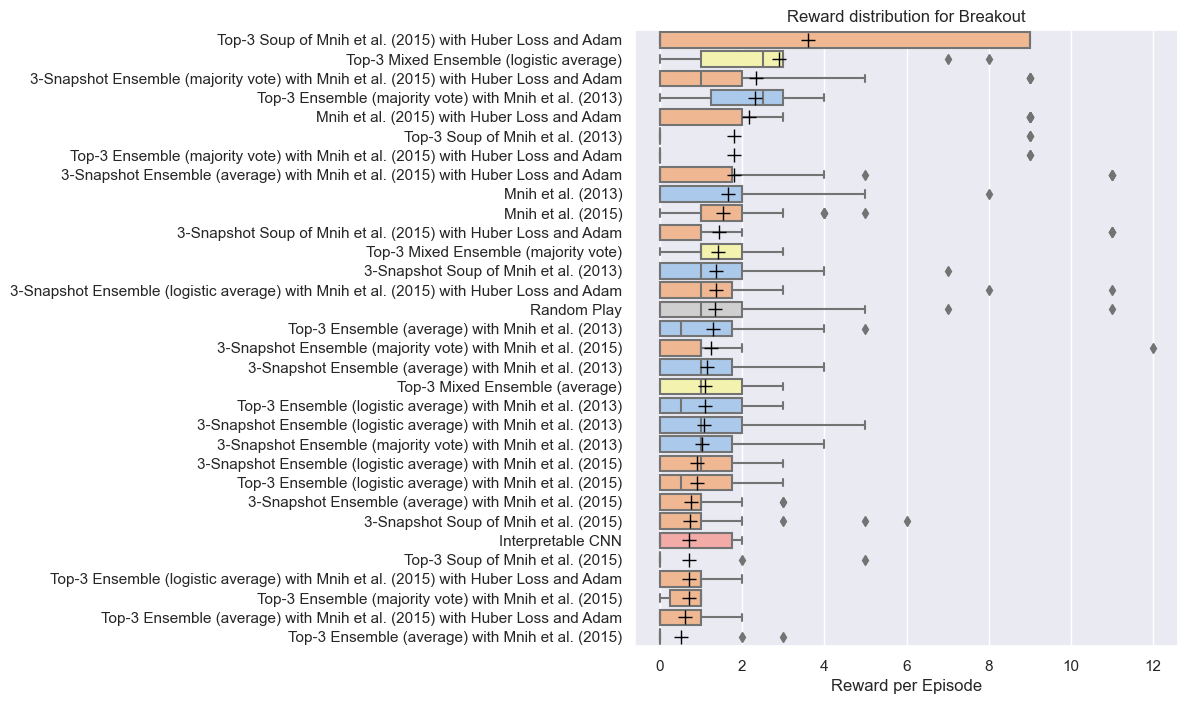

In [10]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    sns.set(rc={'figure.figsize':(7, 8)})
    chart = sns.boxplot(data=temp_df,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Reward distribution for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_mean.pdf", bbox_inches='tight')
    plt.show()

Boxplot sorted by **median**:

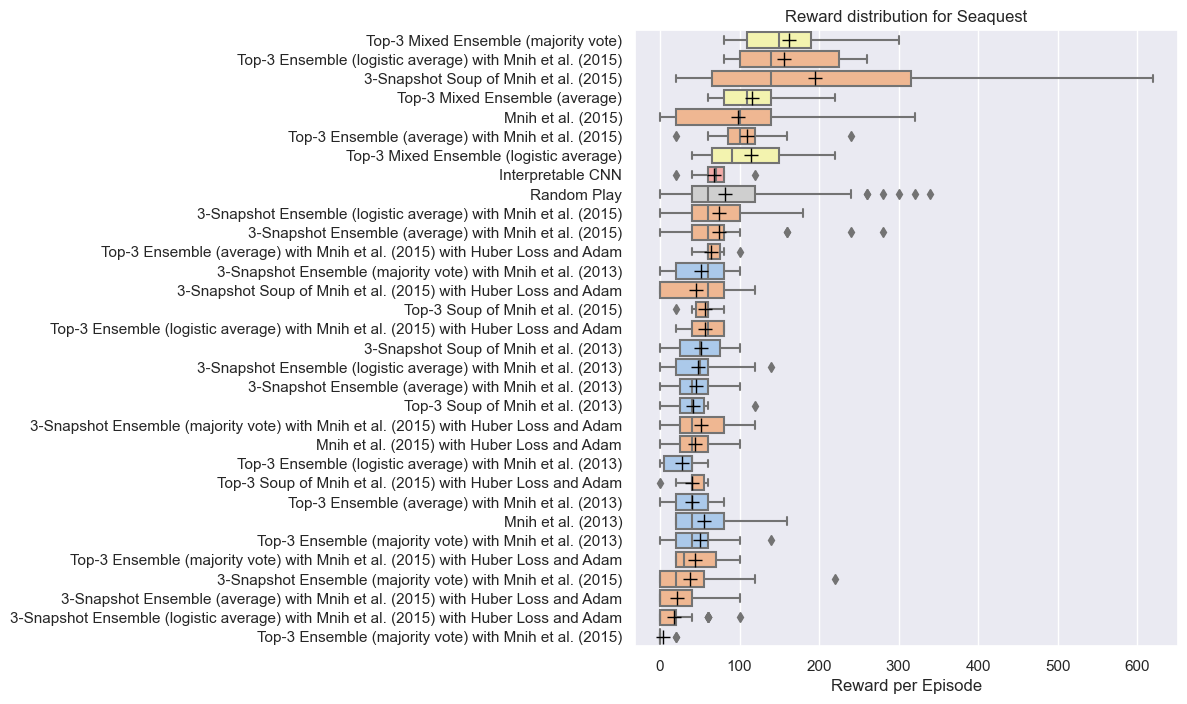

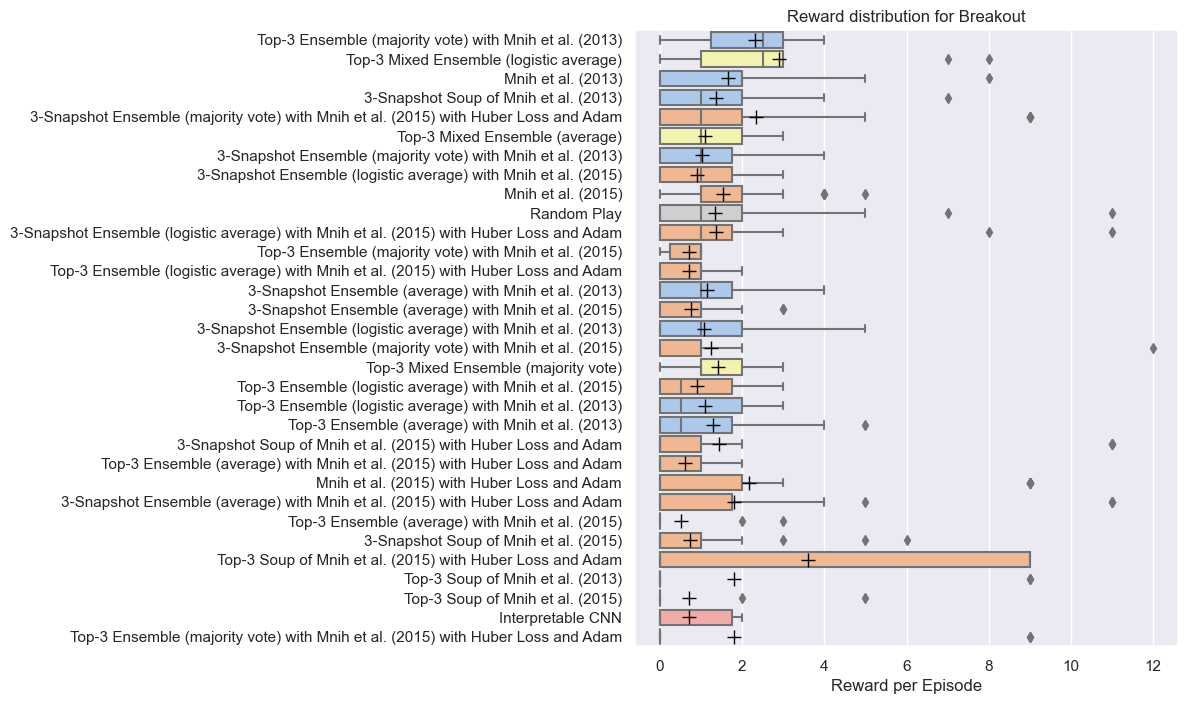

In [11]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["median"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("median"))[["episode_rewards"]]
    temp_df.sort_values(by=["median"], ascending=False, inplace=True)

    sns.set(rc={'figure.figsize':(7, 8)})
    chart = sns.boxplot(data=temp_df,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Reward distribution for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_median.pdf", bbox_inches='tight')
    plt.show()

With Violine Plot:

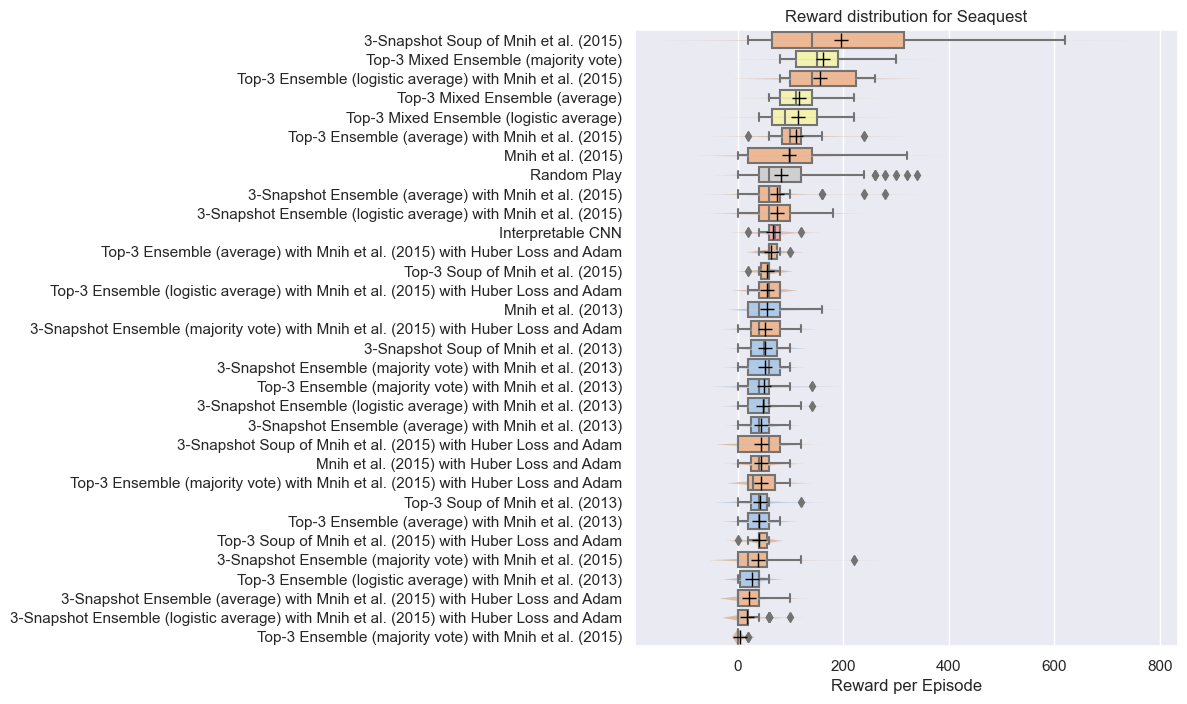

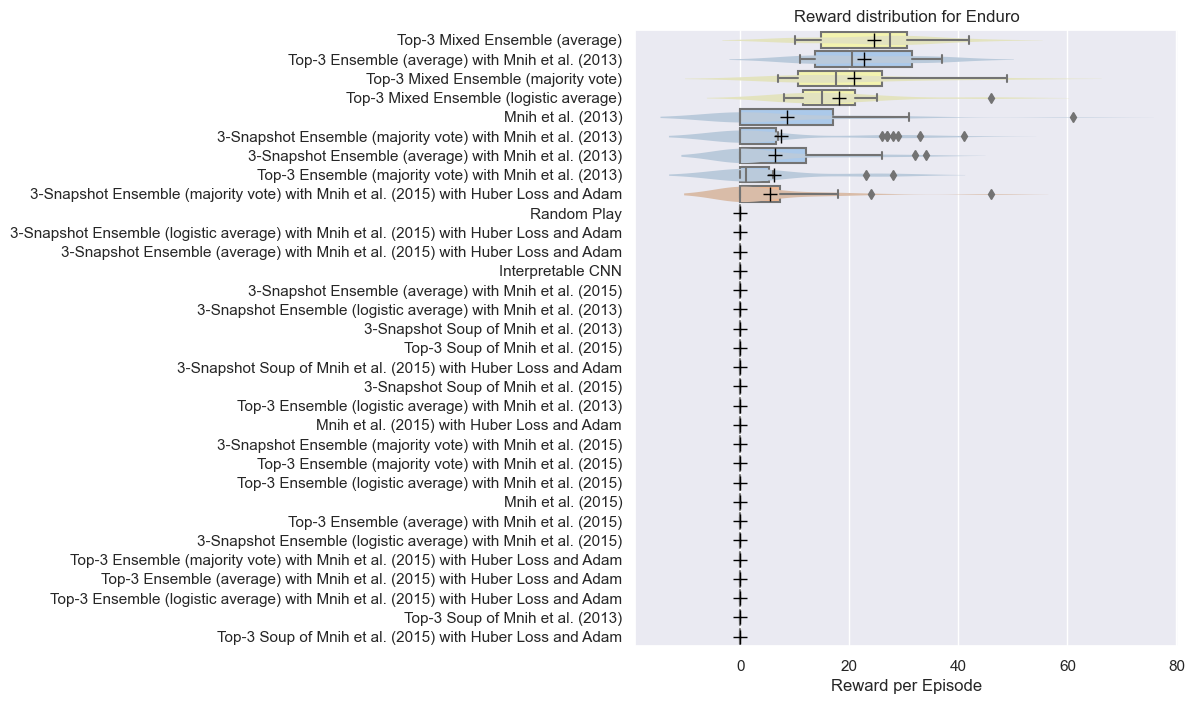

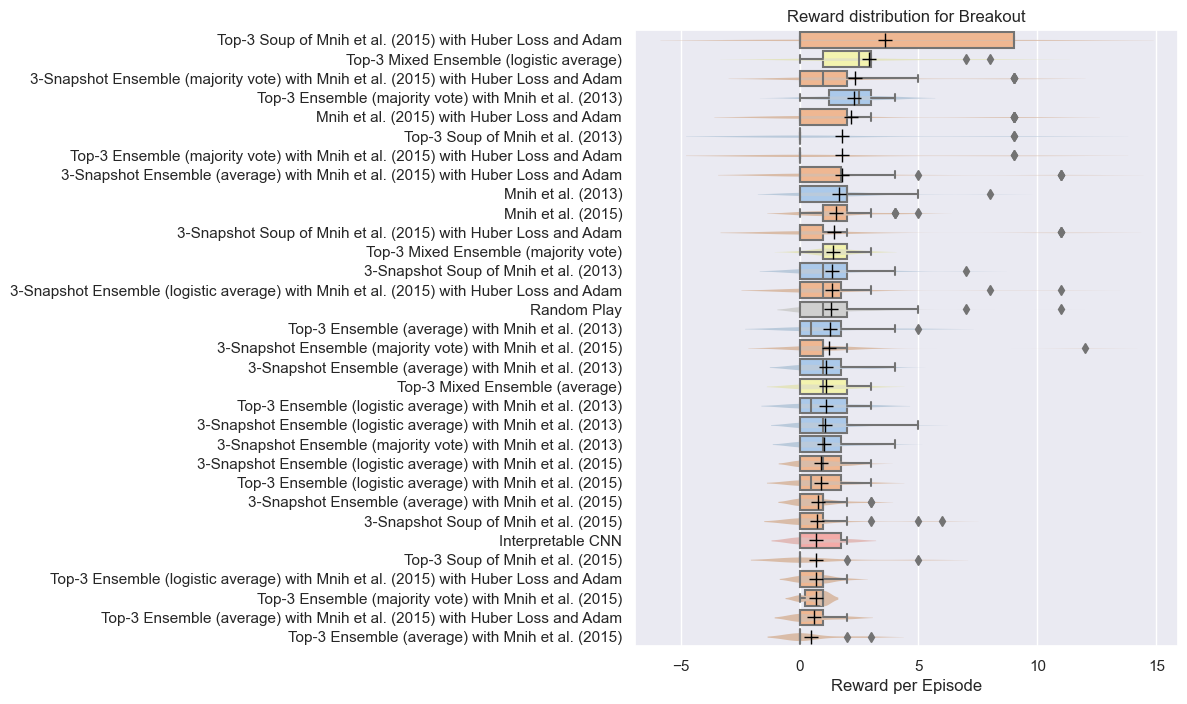

In [12]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    temp_df["episode_rewards"] = temp_df["episode_rewards"].apply(lambda x: float(x))

    ax = sns.violinplot(data=temp_df[["model", "episode_rewards"]], x="episode_rewards", y="model",
                        palette=color_palette, inner=None, linewidth=0, saturation=0.4)
    sns.boxplot(data=temp_df,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette,
                ax=ax)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Reward distribution for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_mean_violine.pdf", bbox_inches='tight')
    plt.show()

## Best Model of each type for each game

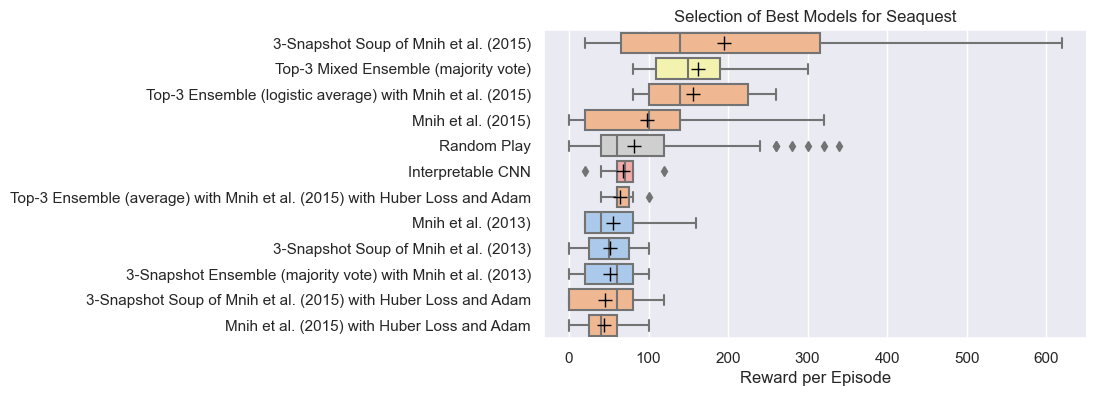

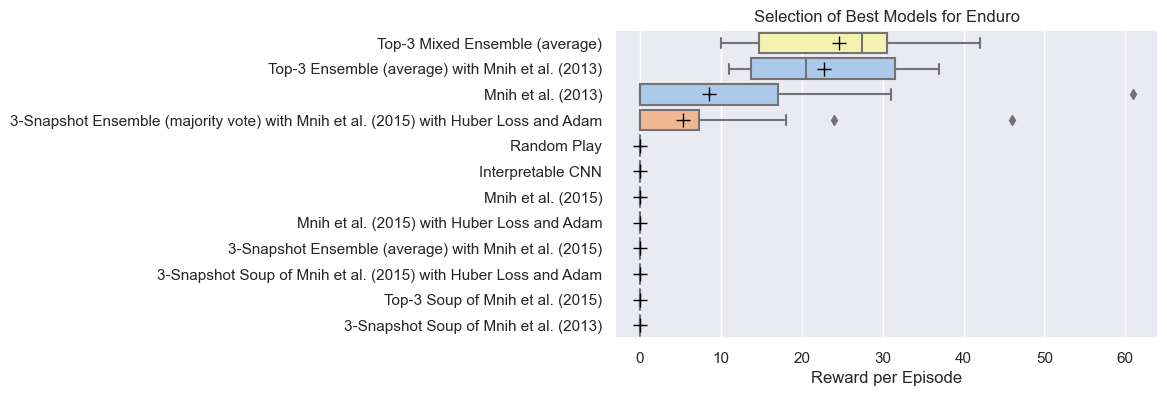

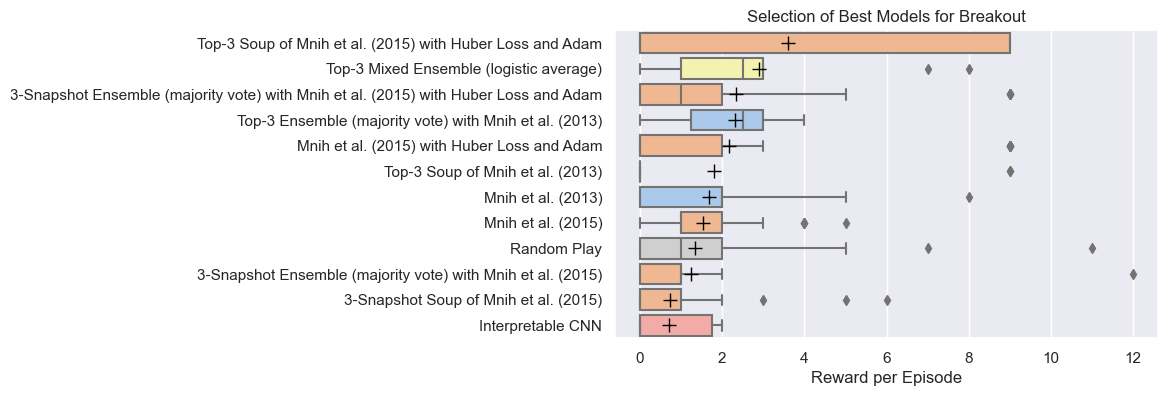

In [13]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards", "mean", "standard_deviation"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    selected_data = pd.DataFrame().reindex_like(temp_df).dropna()
    best_models_per_method_list = []

    for model_name in ["2013", "2015\)$", "Huber Loss and Adam"]:

        # Find best ensemble for each model type:
        best_ensembles = temp_df[temp_df["model"].str.contains(model_name) & temp_df["model"].str.contains("Ensemble")].dropna()
        if len(best_ensembles) > 0:
            best_ensembles = best_ensembles.sort_values(by=["mean", "standard_deviation"], ascending=[False, True], inplace=False)
            # print(f"Best Ensemble for {model_name} / {game}: {best_ensembles.iloc[0]['model']}")
            temp_selection = best_ensembles[best_ensembles["model"] == best_ensembles.iloc[0]["model"]]
            best_models_per_method_list.append(temp_selection)

        # Find best soup for each model type:
        best_soups = temp_df[temp_df["model"].str.contains(model_name) & temp_df["model"].str.contains("Soup")].dropna()
        if len(best_soups) > 0:
            best_soups = best_soups.sort_values(by=["mean", "standard_deviation"], ascending=[False, True], inplace=False)
            # print(f"Best Soup for {model_name} / {game}: {best_soups.iloc[0]['model']}")
            temp_selection = best_soups[best_soups["model"] == best_soups.iloc[0]["model"]]
            best_models_per_method_list.append(temp_selection)

    # Find best mixed ensemble:
    best_mixed_ensemble = temp_df[temp_df["model"].str.contains("Mixed")].dropna()
    if len(best_mixed_ensemble) > 0:
        best_mixed_ensemble = best_mixed_ensemble.sort_values(by=["mean", "standard_deviation"], ascending=[False, True], inplace=False)
        # print(f"Best Mixed Ensemble for {game}: {best_mixed_ensemble.iloc[0]['model']}")
        temp_selection = best_mixed_ensemble[best_mixed_ensemble["model"] == best_mixed_ensemble.iloc[0]["model"]]
        best_models_per_method_list.append(temp_selection)

    selected_data = pd.concat(best_models_per_method_list)
    selected_data = pd.concat([
        selected_data,
        temp_df[(~temp_df["model"].str.contains("Ensemble")) & (~temp_df["model"].str.contains("Soup"))],
    ])

    sns.set(rc={'figure.figsize':(7, 4)})
    selected_data.sort_values(by=["mean"], ascending=False, inplace=True)
    chart = sns.boxplot(data=selected_data,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette
                        )
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Selection of Best Models for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_mean_filtered.pdf", bbox_inches='tight')
    plt.show()

## Compare all individual models

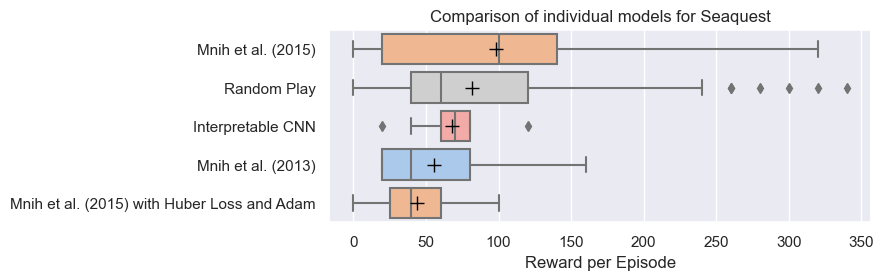

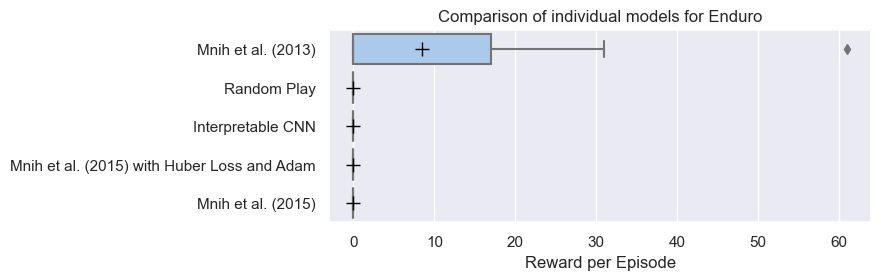

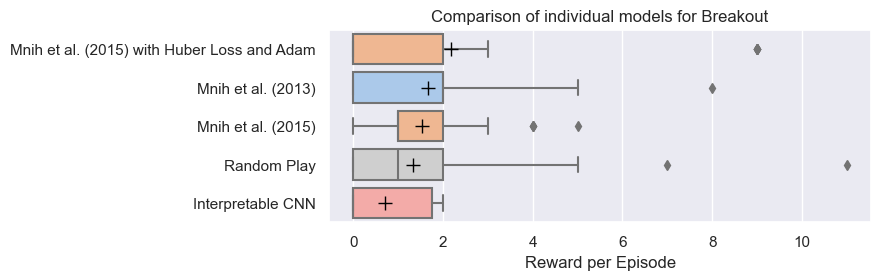

In [14]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    all_individual_models =  temp_df[~temp_df["model"].str.contains("Ensemble") & ~temp_df["model"].str.contains("Soup")].dropna()
    all_individual_models.sort_values(by=["mean"], ascending=False, inplace=True)
    sns.set(rc={'figure.figsize':(7, 2.5)})
    chart = sns.boxplot(data=all_individual_models,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Comparison of individual models for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_individual_models.pdf", bbox_inches='tight')
    plt.show()

## Compare different Ensembles

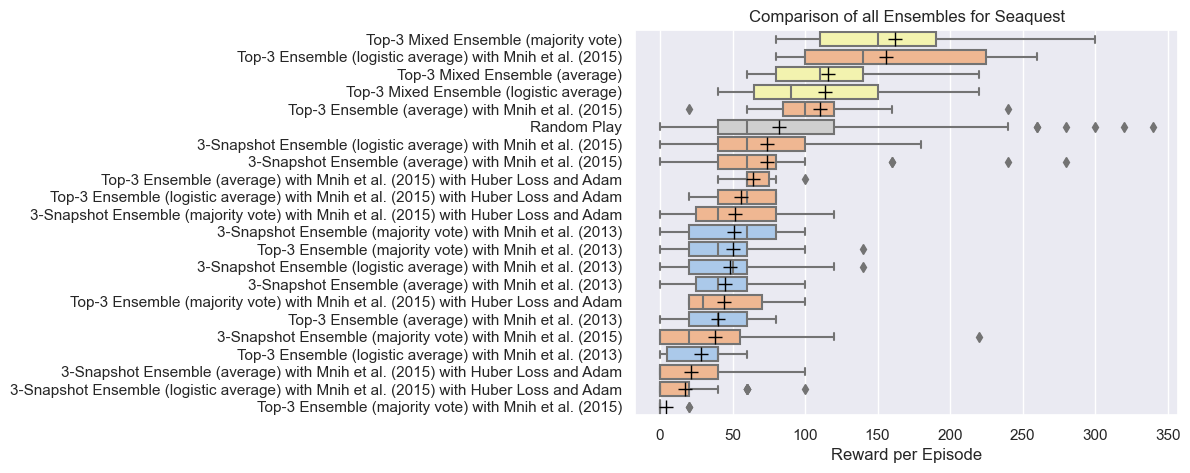

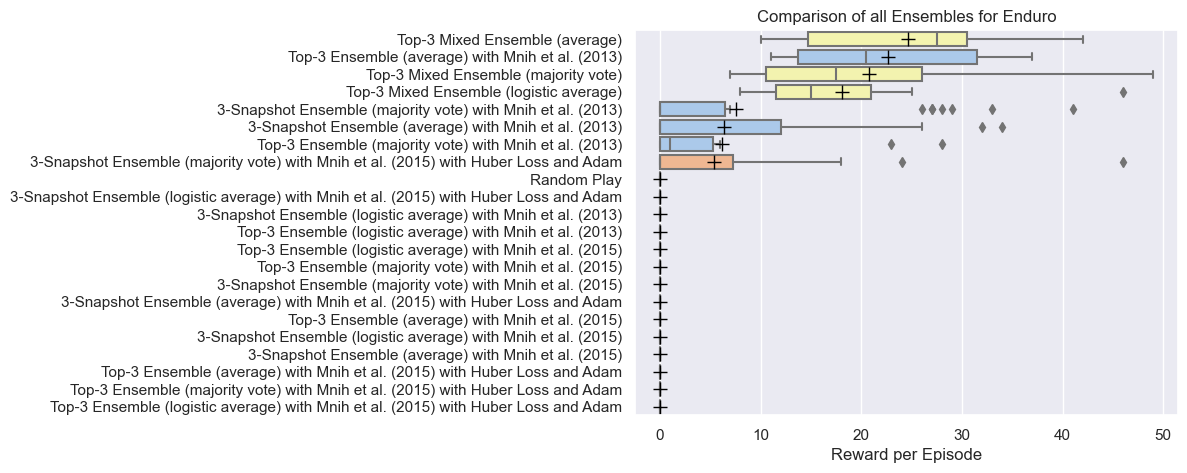

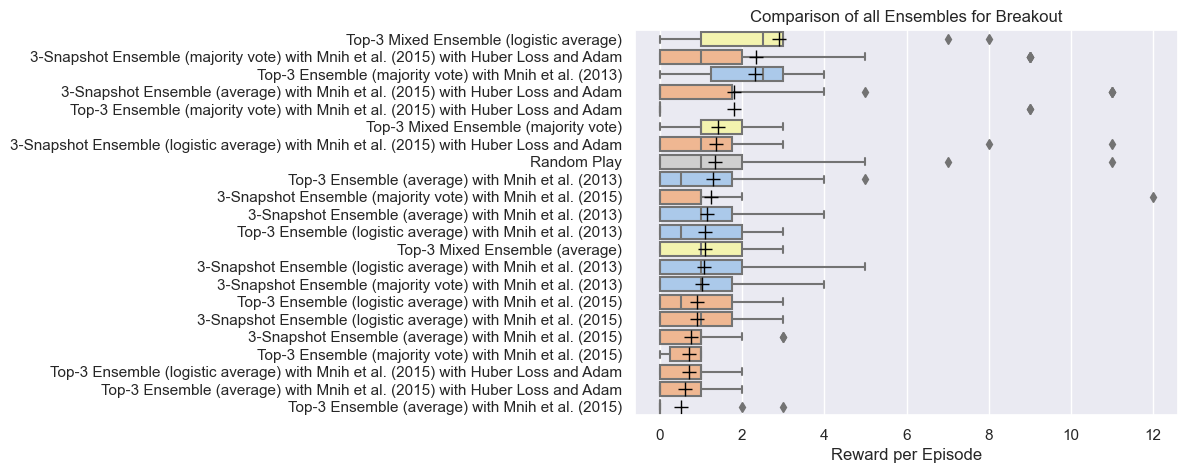

In [15]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    all_ensembles =  temp_df[temp_df["model"].str.contains("Ensemble")].dropna()


    selected_data = pd.concat([
        all_ensembles,
        temp_df[temp_df["model"].str.contains("Random")],
    ])

    selected_data.sort_values(by=["mean"], ascending=False, inplace=True)
    sns.set(rc={'figure.figsize':(7, 5)})
    chart = sns.boxplot(data=selected_data,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Comparison of all Ensembles for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_ensembles.pdf", bbox_inches='tight')
    plt.show()

## Compare different Soups

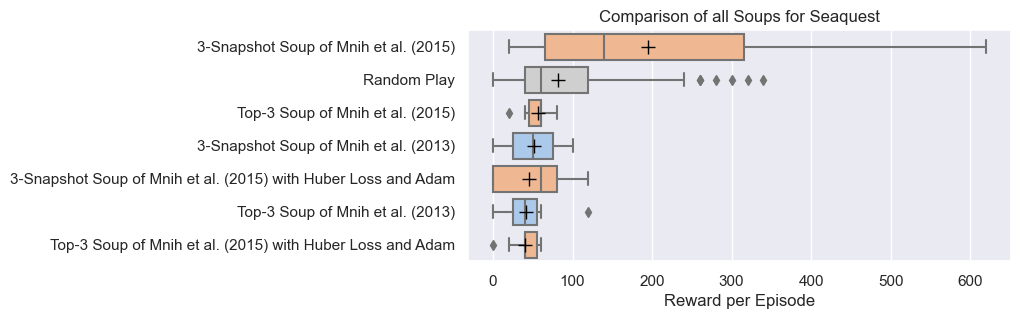

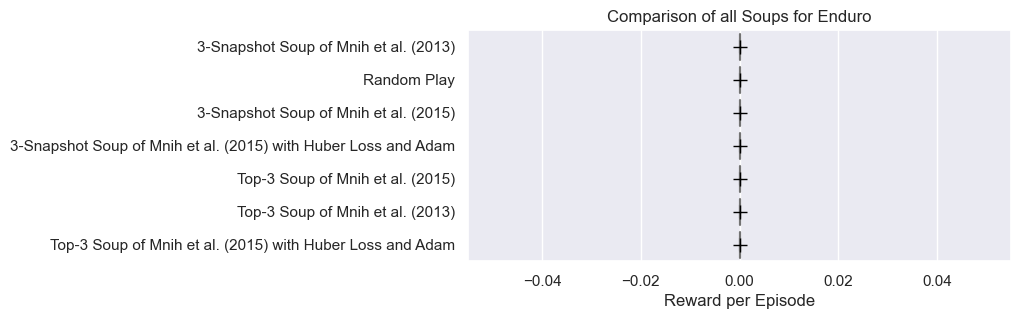

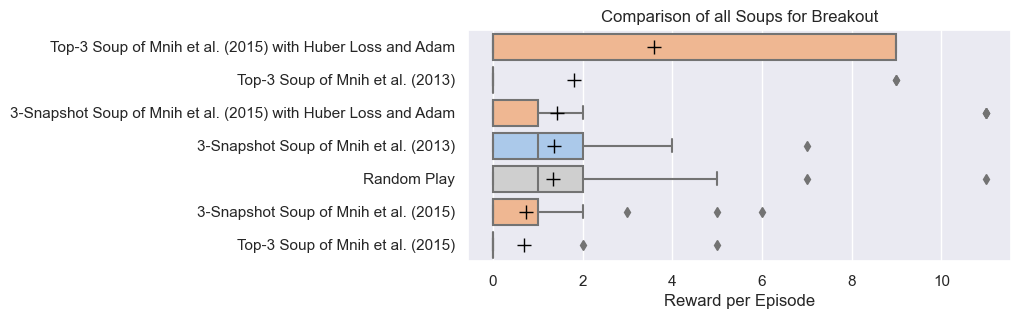

In [16]:
for game in evaluation_data_df[['game']].drop_duplicates().values.flatten():
    temp_df = evaluation_data_df_exploded[evaluation_data_df_exploded["game"] == game][["model", "episode_rewards"]]
    # Calculate the mean of the rewards per model:
    temp_df[["mean"]] = pd.DataFrame(temp_df.groupby("model")["episode_rewards"].transform("mean"))[["episode_rewards"]]
    temp_df.sort_values(by=["mean"], ascending=False, inplace=True)

    all_soups =  temp_df[temp_df["model"].str.contains("Soup")].dropna()


    selected_data = pd.concat([
        all_soups,
        temp_df[temp_df["model"].str.contains("Random")],
    ])

    sns.set(rc={'figure.figsize':(7, 3)})
    selected_data.sort_values(by=["mean"], ascending=False, inplace=True)
    chart = sns.boxplot(data=selected_data,
                x="episode_rewards", y="model", showmeans=True,
                meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"},
                palette=color_palette)
    plt.ylabel(None)
    plt.xlabel("Reward per Episode")
    plt.title(f"Comparison of all Soups for {game.capitalize()}")
    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_distribution_{game}_soups.pdf", bbox_inches='tight')
    plt.show()

## Save some reward history and loss history plots
Finds best run for each model and saves the reward history and loss history plots:

In [17]:
results_df = pd.read_csv(RESULTS_CSV)

In [18]:
history_plots_results_df = results_df
history_plots_results_df["training_model"] = history_plots_results_df["training_model"].apply(lambda x: naming_scheme[x])
history_plots_evaluation_df = evaluation_data_df.copy()
history_plots_evaluation_df = history_plots_evaluation_df[history_plots_evaluation_df["model"].isin(results_df["training_model"].unique())]
history_plots_evaluation_df

game                                        model  model_id  \
7   seaquest                           Mnih et al. (2015)         0   
9   seaquest                           Mnih et al. (2015)         2   
6   seaquest                            Interpretable CNN         0   
3   seaquest                           Mnih et al. (2013)         0   
5   seaquest                           Mnih et al. (2013)         2   
4   seaquest                           Mnih et al. (2013)         1   
11  seaquest  Mnih et al. (2015) with Huber Loss and Adam         1   
12  seaquest  Mnih et al. (2015) with Huber Loss and Adam         2   
10  seaquest  Mnih et al. (2015) with Huber Loss and Adam         0   
14    enduro                           Mnih et al. (2013)         1   
8   seaquest                           Mnih et al. (2015)         1   
31  breakout  Mnih et al. (2015) with Huber Loss and Adam         1   
30  breakout  Mnih et al. (2015) with Huber Loss and Adam         0   
28  breakout                           Mnih et al. (2015)         1   
25  breakout                           Mnih et al. (2013)         2   
24  breakout                           Mnih et al. (2013)         1   
23  breakout                           Mnih et al. (2013)         0   
27  breakout                           Mnih et al. (2015)         0   
29  breakout                           Mnih et al. (2015)         2   
32  breakout  Mnih et al. (2015) with Huber Loss and Adam         2   
26  breakout                            Interpretable CNN         0   
21    enduro  Mnih et al. (2015) with Huber Loss and Adam         1   
20    enduro  Mnih et al. (2015) with Huber Loss and Adam         0   
19    enduro                           Mnih et al. (2015)         2   
22    enduro  Mnih et al. (2015) with Huber Loss and Adam         2   
18    enduro                           Mnih et al. (2015)         1   
17    enduro                           Mnih et al. (2015)         0   
13    enduro                           Mnih et al. (2013)         0   
15    enduro                           Mnih et al. (2013)         2   
16    enduro                            Interpretable CNN         0   

                                      episode_rewards   mean  \
7   [120.0, 100.0, 140.0, 140.0, 100.0, 160.0, 220...  140.0   
9   [320.0, 120.0, 160.0, 120.0, 100.0, 100.0, 100...  138.0   
6   [120.0, 60.0, 80.0, 40.0, 80.0, 60.0, 60.0, 20...   68.0   
3   [80.0, 20.0, 40.0, 80.0, 60.0, 160.0, 20.0, 40...   62.0   
5   [20.0, 20.0, 20.0, 80.0, 100.0, 80.0, 120.0, 4...   52.0   
4   [20.0, 40.0, 20.0, 60.0, 40.0, 60.0, 60.0, 120...   52.0   
11  [20.0, 20.0, 40.0, 40.0, 100.0, 40.0, 100.0, 6...   50.0   
12  [40.0, 80.0, 60.0, 60.0, 40.0, 40.0, 60.0, 60....   48.0   
10  [0.0, 40.0, 20.0, 40.0, 40.0, 40.0, 40.0, 60.0...   34.0   
14  [14.0, 10.0, 18.0, 61.0, 27.0, 25.0, 18.0, 22....   25.5   
8   [20.0, 0.0, 20.0, 0.0, 60.0, 20.0, 0.0, 20.0, ...   16.0   
31  [9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, ...    2.7   
30  [0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 9.0, ...    2.7   
28  [2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 4.0, 2.0, 0.0, ...    1.9   
25  [2.0, 0.0, 0.0, 2.0, 1.0, 8.0, 0.0, 0.0, 0.0, ...    1.8   
24  [2.0, 2.0, 0.0, 3.0, 2.0, 2.0, 0.0, 2.0, 2.0, ...    1.7   
23  [2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 1.0, ...    1.5   
27  [4.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 5.0, ...    1.4   
29  [2.0, 2.0, 4.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, ...    1.3   
32  [0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...    1.1   
26  [0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, ...    0.7   
21  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
20  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
22  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
18  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
17  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
13  [0.0, 0.0,

In [19]:
# Join evaluation and results via the path:
history_plots_joined = history_plots_results_df.merge(history_plots_evaluation_df, on=["model_path", "game"], how="inner")
history_plots_joined

game                               training_model  \
0   seaquest                           Mnih et al. (2013)   
1     enduro                            Interpretable CNN   
2   breakout                            Interpretable CNN   
3     enduro                           Mnih et al. (2013)   
4   seaquest                           Mnih et al. (2013)   
5   breakout                           Mnih et al. (2013)   
6     enduro                           Mnih et al. (2013)   
7   breakout                           Mnih et al. (2013)   
8   breakout                           Mnih et al. (2013)   
9   seaquest                           Mnih et al. (2015)   
10  seaquest                           Mnih et al. (2015)   
11  breakout  Mnih et al. (2015) with Huber Loss and Adam   
12    enduro                           Mnih et al. (2015)   
13  breakout  Mnih et al. (2015) with Huber Loss and Adam   
14  breakout                           Mnih et al. (2015)   
15  seaquest                           Mnih et al. (2015)   
16  breakout  Mnih et al. (2015) with Huber Loss and Adam   
17    enduro  Mnih et al. (2015) with Huber Loss and Adam   
18    enduro  Mnih et al. (2015) with Huber Loss and Adam   
19    enduro  Mnih et al. (2015) with Huber Loss and Adam   
20  seaquest  Mnih et al. (2015) with Huber Loss and Adam   
21  seaquest  Mnih et al. (2015) with Huber Loss and Adam   
22  seaquest  Mnih et al. (2015) with Huber Loss and Adam   
23  seaquest                            Interpretable CNN   
24    enduro                           Mnih et al. (2013)   
25  seaquest                           Mnih et al. (2013)   
26  breakout                           Mnih et al. (2015)   
27    enduro                           Mnih et al. (2015)   
28  breakout                           Mnih et al. (2015)   
29    enduro                           Mnih et al. (2015)   

                                       reward_history  \
0   [100.0, 0.0, 100.0, 100.0, 0.0, 120.0, 40.0, 2...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [0.0, 2.0, 0.0, 1.0, 4.0, 2.0, 0.0, 1.0, 0.0, ...   
3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4   [0.0, 40.0, 20.0, 20.0, 20.0, 120.0, 160.0, 20...   
5   [0.0, 0.0, 2.0, 0.0, 2.0, 6.0, 1.0, 1.0, 1.0, ...   
6   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7   [1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, ...   
8   [0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, ...   
9   [60.0, 20.0, 160.0, 120.0, 20.0, 160.0, 80.0, ...   
10  [40.0, 60.0, 160.0, 60.0, 0.0, 140.0, 20.0, 10...   
11  [0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0.0, 3.0, 1.0, ...   
12  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
13  [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...   
14  [2.0, 0.0, 1.0, 1.0, 0.0, 5.0, 2.0, 3.0, 0.0, ...   
15  [60.0, 40.0, 0.0, 20.0, 20.0, 40.0, 40.0, 80.0...   
16  [1.0, 3.0, 2.0, 1.0, 0.0, 4.0, 1.0, 2.0, 0.0, ...   
17  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
18  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
19  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
20  [60.0, 0.0, 20.0, 80.0, 120.0, 220.0, 40.0, 40...   
21  [40.0, 60.0, 100.0, 200.0, 60.0, 80.0, 40.0, 1...   
22  [80.0, 100.0, 60.0, 80.0, 120.0, 40.0, 40.0, 1...   
23  [60.0, 40.0, 40.0, 20.0, 60.0, 80.0, 60.0, 0.0...   
24  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
25  [120.0, 40.0, 120.0, 220.0, 80.0, 40.0, 180.0,...   
26  [0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, ...   
27  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
28  [0.0, 0.0, 2.0, 3.0, 2.0, 3.0, 2.0, 0.0, 1.0, ...   
29  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         loss_history  \
0   [0.012014569714665413, 12.65832805633545, 0.01...   
1   [8.388333662878722e-05, 0.00010635607759468257...   
2   [5.418467117124237e-05, 4.053674638271332e-05,...   
3   [0.021065175533294678, 0.022660288959741592, 0...   
4   [0.02780219167470932, 0.027884984388947487, 0....   
5   [0

In [20]:
# Find best run for each model:
history_plots_best_run = history_plots_joined.groupby(["training_model", "game"]).apply(lambda x: x.nlargest(1, "mean"))
history_plots_best_run["reward_history"] = history_plots_best_run["reward_history"].apply(literal_eval)
history_plots_best_run["loss_history"] = history_plots_best_run["loss_history"].apply(literal_eval)
history_plots_best_run.reset_index(drop=True, inplace=True)
history_plots_best_run

game                               training_model  \
0   breakout                            Interpretable CNN   
1     enduro                            Interpretable CNN   
2   seaquest                            Interpretable CNN   
3   breakout                           Mnih et al. (2013)   
4     enduro                           Mnih et al. (2013)   
5   seaquest                           Mnih et al. (2013)   
6   breakout                           Mnih et al. (2015)   
7     enduro                           Mnih et al. (2015)   
8   seaquest                           Mnih et al. (2015)   
9   breakout  Mnih et al. (2015) with Huber Loss and Adam   
10    enduro  Mnih et al. (2015) with Huber Loss and Adam   
11  seaquest  Mnih et al. (2015) with Huber Loss and Adam   

                                       reward_history  \
0   [0.0, 2.0, 0.0, 1.0, 4.0, 2.0, 0.0, 1.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [60.0, 40.0, 40.0, 20.0, 60.0, 80.0, 60.0, 0.0...   
3   [0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, ...   
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5   [100.0, 0.0, 100.0, 100.0, 0.0, 120.0, 40.0, 2...   
6   [0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, ...   
7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8   [60.0, 20.0, 160.0, 120.0, 20.0, 160.0, 80.0, ...   
9   [0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0.0, 3.0, 1.0, ...   
10  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11  [40.0, 60.0, 100.0, 200.0, 60.0, 80.0, 40.0, 1...   

                                         loss_history  \
0   [5.418467117124237e-05, 4.053674638271332e-05,...   
1   [8.388333662878722e-05, 0.00010635607759468257...   
2   [0.00014377813204191625, 0.6098244190216064, 0...   
3   [0.04034668952226639, 0.004771257750689983, 0....   
4   [0.042389389127492905, 0.031015925109386444, 0...   
5   [0.012014569714665413, 12.65832805633545, 0.01...   
6   [0.009942824020981789, 0.009022442623972893, 0...   
7   [0.04369443282485008, 0.045259371399879456, 0....   
8   [0.017326438799500465, 0.0166097991168499, 0.0...   
9   [0.016652332618832588, 0.290760338306427, 0.01...   
10  [0.017572276294231415, 0.03600158914923668, 0....   
11  [1.2385754585266113, 0.00925319455564022, 0.00...   

                                           model_path  \
0   interpretable_cnn/breakout/started_at_2023-09-...   
1   interpretable_cnn/enduro/started_at_2023-09-25...   
2   interpretable_cnn/seaquest/started_at_2023-09-...   
3   mnih2013/breakout/started_at_2023-09-26_04-49-...   
4   mnih2013/enduro/started_at_2023-09-25_13-26-14...   
5   mnih2013/seaquest/started_at_2023-09-25_12-09-...   
6   mnih2015/breakout/started_at_2023-09-28_01-35-...   
7   mnih2015/enduro/started_at_2023-09-26_06-57-52...   
8   mnih2015/seaquest/started_at_2023-09-26_05-09-...   
9   with_huber_loss_and_adam/breakout/started_at_2...   
10  with_huber_loss_and_adam/enduro/started_at_202...   
11  with_huber_loss_and_adam/seaquest/started_at_2...   

                                          model  model_id  \
0                             Interpretable CNN         0   
1                             Interpretable CNN         0   
2                             Interpretable CNN         0   
3                            Mnih et al. (2013)         2   
4                            Mnih et al. (2013)         1   
5                            Mnih et al. (2013)         0   
6                            Mnih et al. (2015)         1   
7                            Mnih et al. (2015)         0   
8                            Mnih et al. (2015)         0   
9   Mnih et al. (2015) with Huber Loss and Adam         0   
10  Mnih et al. (2015) with Huber Loss and Adam         0   
11  Mnih et al. (2015) with Huber Loss and Adam         1   

                                      episode_rewards   mean  \
0   [0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, ...    0.7   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.0   
2 

Game: breakout - Model: Interpretable CNN


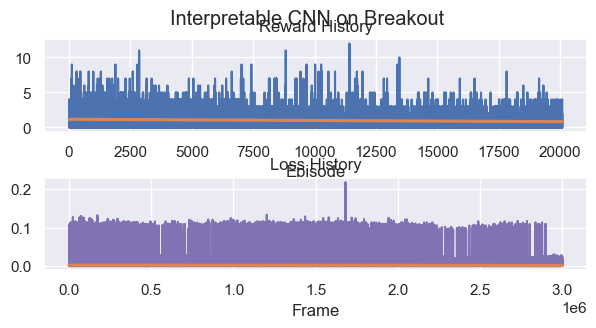

Game: enduro - Model: Interpretable CNN


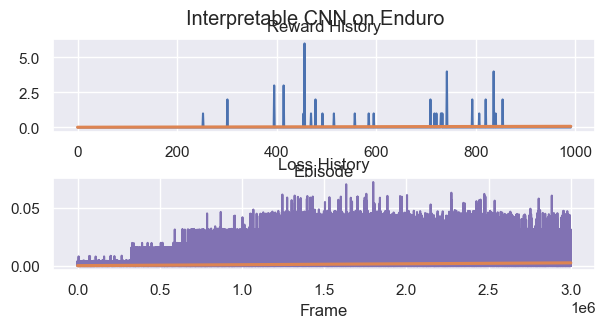

Game: seaquest - Model: Interpretable CNN


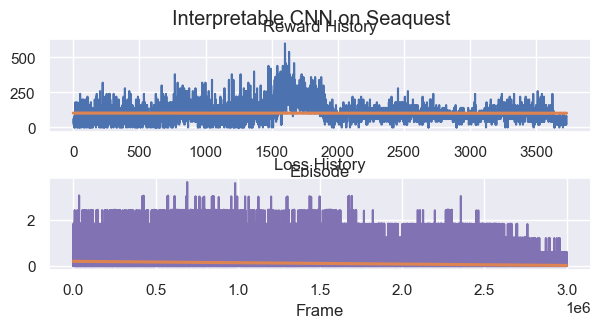

Game: breakout - Model: Mnih et al. (2013)


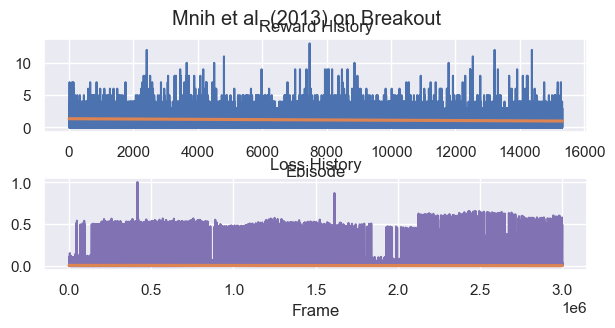

Game: enduro - Model: Mnih et al. (2013)


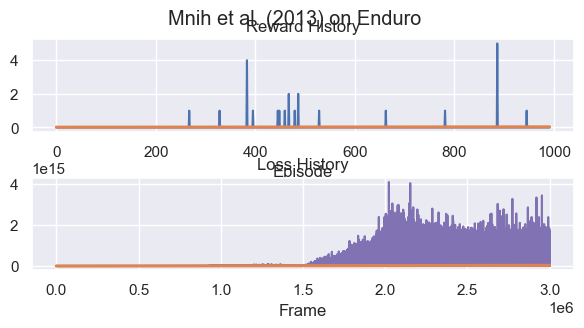

Game: seaquest - Model: Mnih et al. (2013)


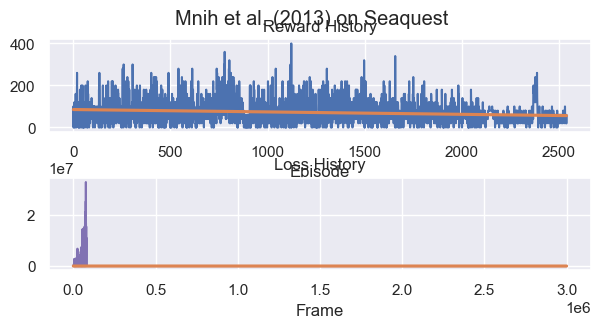

Game: breakout - Model: Mnih et al. (2015)


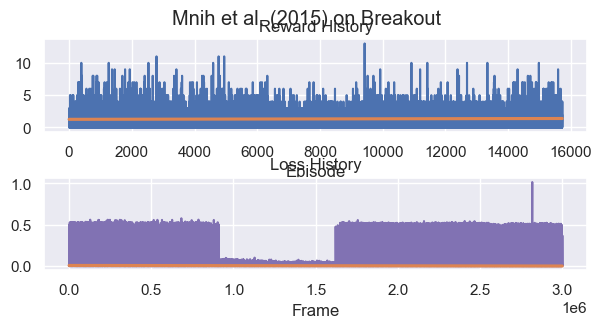

Game: enduro - Model: Mnih et al. (2015)


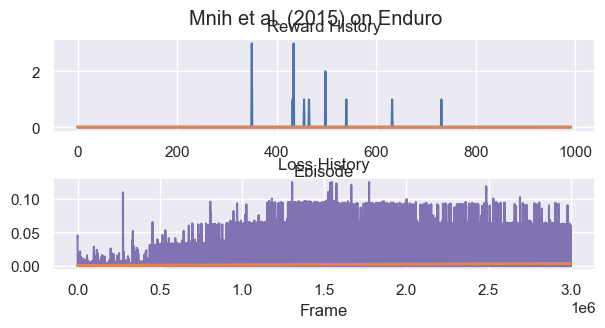

Game: seaquest - Model: Mnih et al. (2015)


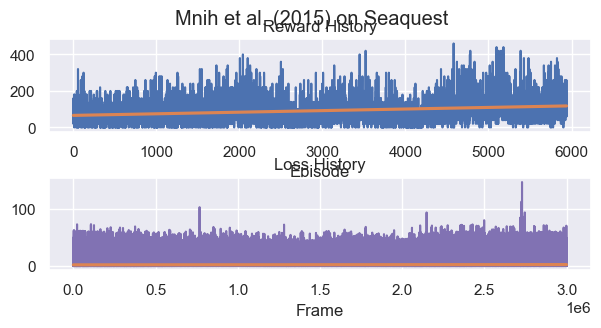

Game: breakout - Model: Mnih et al. (2015) with Huber Loss and Adam


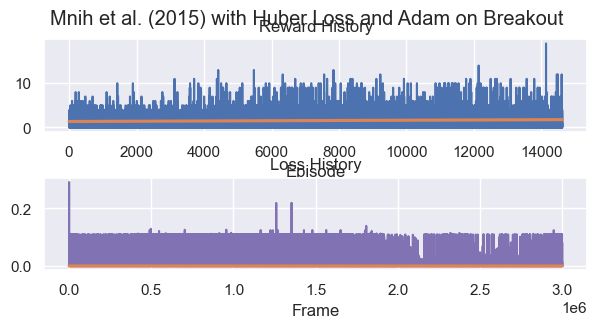

Game: enduro - Model: Mnih et al. (2015) with Huber Loss and Adam


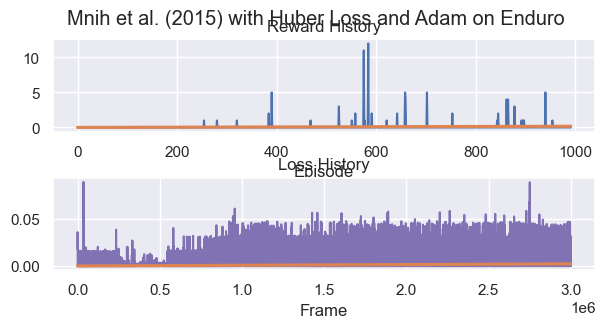

Game: seaquest - Model: Mnih et al. (2015) with Huber Loss and Adam


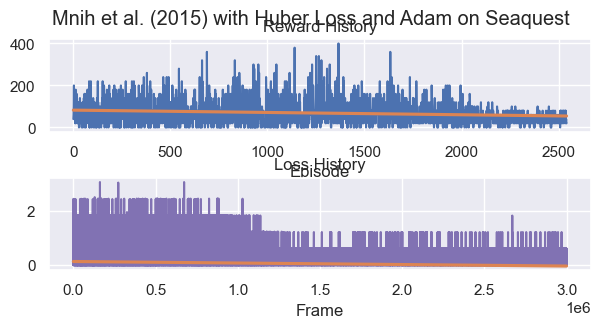

In [21]:
for row in history_plots_best_run.iterrows():
    game_name = row[1]["game"]
    model = row[1]["training_model"]
    r_hist = list(row[1]["reward_history"])
    l_hist = list(row[1]["loss_history"])

    print("Game:", game_name, "- Model:", model)

    fig, axs = plt.subplots(2)
    fig.suptitle(f"{model} on {game_name.capitalize()}")

    axs[0].set_title("Reward History")
    axs[0].set_xlabel("Episode")
    sns.lineplot(x=list(range(len(r_hist))), y=r_hist, ax=axs[0], errorbar=None)
    ax = sns.regplot(x=list(range(len(r_hist))), y=r_hist, ci=None, scatter=False, ax=axs[0], color=sns.color_palette()[1], label="Linear Regression of Data")

    plt.subplots_adjust(hspace = 0.5)

    axs[1].set_title("Loss History")
    axs[1].set_xlabel("Frame")
    sns.lineplot(x=list(range(len(l_hist))), y=l_hist, ax=axs[1], errorbar=None, color=sns.color_palette()[4])
    ax = sns.regplot(x=list(range(len(l_hist))), y=l_hist, ci=None, scatter=False, ax=axs[1], color=sns.color_palette()[1], label="Linear Regression of Data")

    plt.savefig(f"{IMAGES_SAVE_FOLDER}reward_and_loss_history_{game_name}_{model}.pdf", bbox_inches='tight')
    plt.show()